In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
records = pd.read_csv('../data/cleaned_texts_oct19_2016.tsv', sep='\t')
records = records[records.pub_year > 1699]
records = records[records.pub_year < 1800]

In [3]:
len(records)

87907

In [4]:
records.head(1)

,Unnamed: 0,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,slug,canonical_city,canonical_country
91,117,11003743,historia de las guerras de los judios y de la ...,NaN,"josephus, flavius",en la oficina de don benito cano,madrid,1791,NaN,NaN,"madrid,spain",madrid,spain


In [5]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)

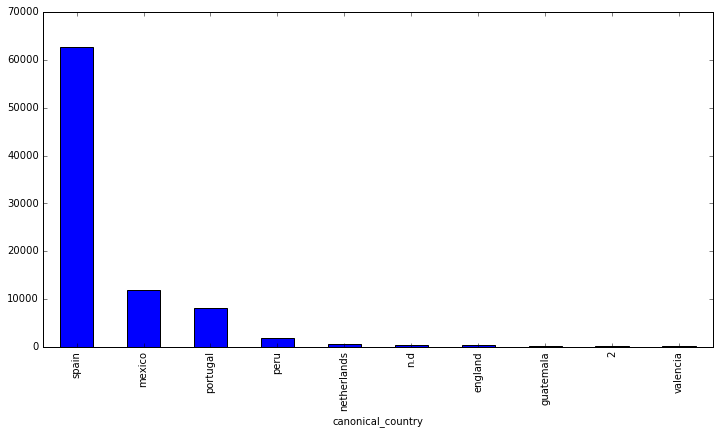

In [6]:
records.groupby('canonical_country').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].plot(kind="bar")

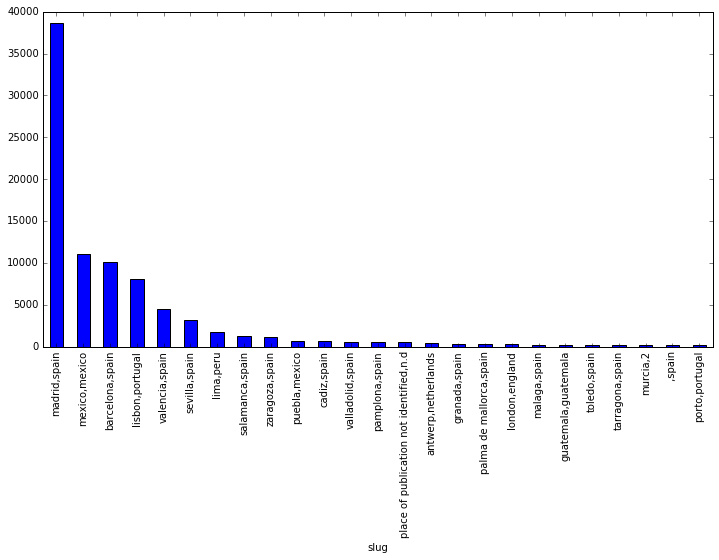

In [7]:
records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:25].plot(kind="bar")

## Global Publication By Year

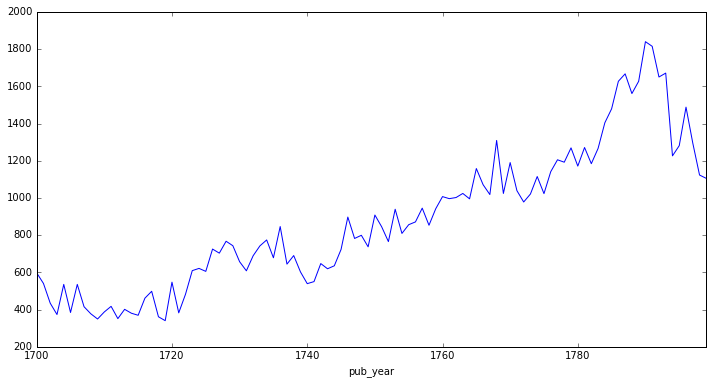

In [8]:
records.sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [9]:
# records[records.pub_year < 1900].sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [10]:
# records[records.pub_year > 1900].sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [11]:
top_slugs = records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].index
top_slugs

Index(['madrid,spain', 'mexico,mexico', 'barcelona,spain', 'lisbon,portugal',
       'valencia,spain', 'sevilla,spain', 'lima,peru', 'salamanca,spain',
       'zaragoza,spain', 'puebla,mexico'],
      dtype='object', name='slug')

In [12]:
top_producers = records[records.slug.isin(top_slugs)]

In [13]:
group_top_producers = top_producers.sort_values('pub_year').groupby(['slug', 'pub_year']).count()['control_number']

In [18]:
top_producer_df = pd.DataFrame({
    'madrid,spain': group_top_producers.ix['madrid,spain'],
    'mexico,mexico': group_top_producers.ix['mexico,mexico'],
    'barcelona,spain': group_top_producers.ix['barcelona,spain'],
    'lisbon,portugal': group_top_producers.ix['lisbon,portugal'],
    'valencia,spain': group_top_producers.ix['valencia,spain'], 
    'sevilla,spain': group_top_producers.ix['sevilla,spain'],
    'lima,peru': group_top_producers.ix['lima,peru'],
    'salamanca,spain': group_top_producers.ix['salamanca,spain'],
    'zaragoza,spain': group_top_producers.ix['zaragoza,spain'],
    'puebla,mexico': group_top_producers.ix['puebla,mexico'],
       
}).fillna(0)

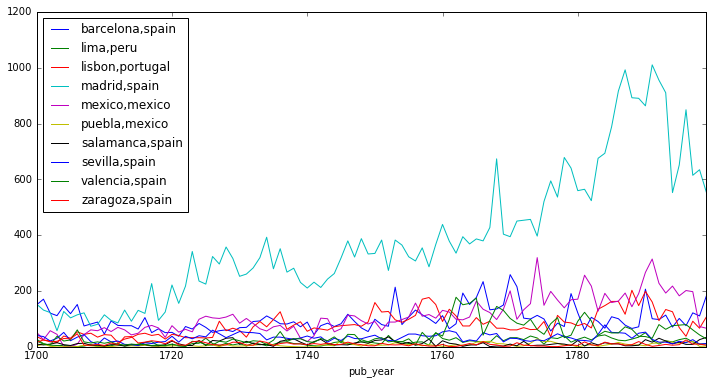

In [15]:
top_producer_df.plot()

In [16]:
counted_by_year = records.sort_values('pub_year').groupby('pub_year').count()['control_number']

In [24]:
top_producer_df_percent = pd.DataFrame({
    'madrid,spain': top_producer_df['madrid,spain'].divide(counted_by_year.values),
    'mexico,mexico': top_producer_df['mexico,mexico'].divide(counted_by_year.values),
    'barcelona,spain': top_producer_df['barcelona,spain'].divide(counted_by_year.values),
    'lisbon,portugal': top_producer_df['lisbon,portugal'].divide(counted_by_year.values),
    'valencia,spain': top_producer_df['valencia,spain'].divide(counted_by_year.values), 
#     'sevilla,spain': top_producer_df['sevilla,spain'].divide(counted_by_year.values),
#     'lima,peru': top_producer_df['lima,peru'].divide(counted_by_year.values),
#     'salamanca,spain': top_producer_df['salamanca,spain'].divide(counted_by_year.values),
#     'zaragoza,spain': top_producer_df['zaragoza,spain'].divide(counted_by_year.values),
#     'puebla,mexico': top_producer_df['puebla,mexico'].divide(counted_by_year.values),
       
})

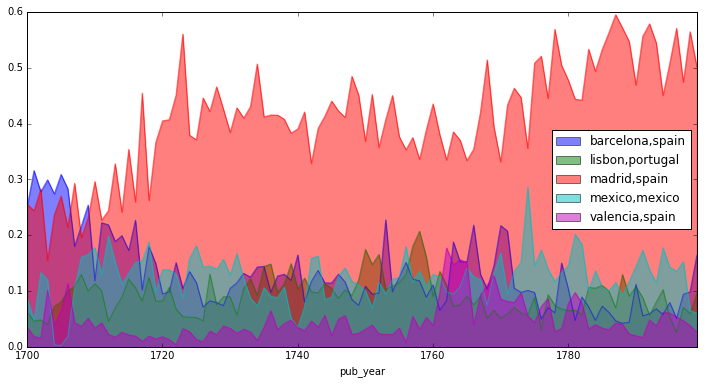

In [25]:
top_producer_df_percent.plot.area(stacked=False)